<a href="https://colab.research.google.com/github/akashkivani/almabetter-Email-Campaign-Effectiveness-Prediction-Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in Business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

---



---



0. Importing Libraries and data.

---



In [120]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/AlmaBetter School/Capstone/Project 3/Data/data_email_campaign.csv')

In [122]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [123]:
df.shape

(68353, 12)

In [124]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [126]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


**Data Summary**:


---


Our email campaign dataset have 68353 observations and 12 features. Clearly Email_Status is our target variable.

Our features:

**Email Id** - It contains the email id's of the customers/individuals

**Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

**Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.

**Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

**Email Campaign Type** - The campaign type of the email.

**Total Past Communications**- This column contains the total previous mails from the same source, the number of communications had.

**Customer Location**- Contains demographical data of the customer, the location where the customer resides.

**Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

**Word Count** - The number of words contained in the email.

**Total links** - Number of links in the email.

**Total Images** - Number of images in the email.

**Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

1. Data Cleaning and pre-processing

---



In [127]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

Taking care of total past communication first.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


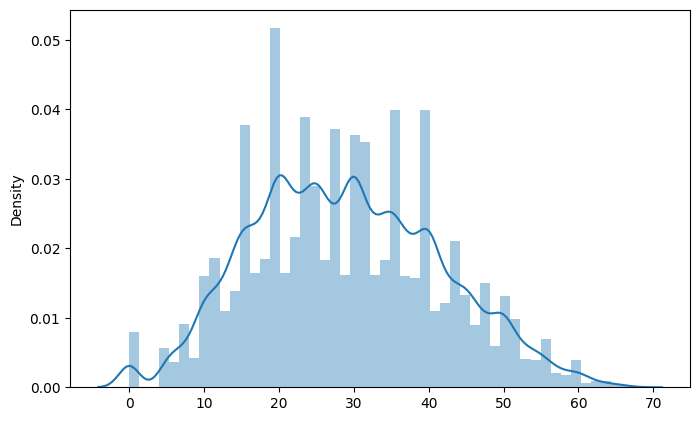

In [128]:
sns.distplot(x = df['Total_Past_Communications'] , hist = True)

The plot seems to be a normal distribution, thus deciding to fill NAN in this column with mean. 

In [129]:
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean() , inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


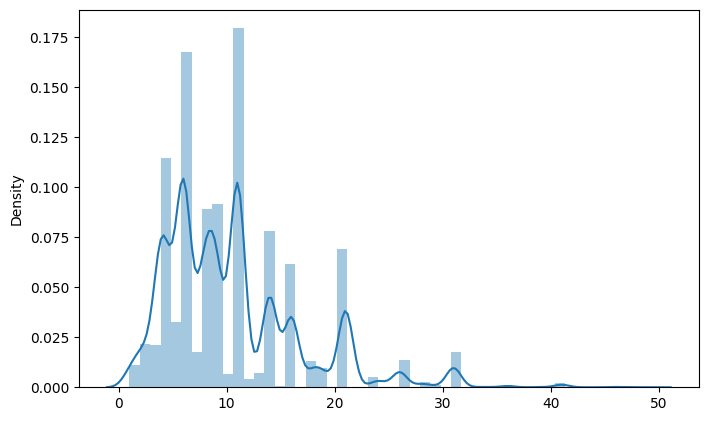

In [130]:
sns.distplot(x = df['Total_Links'] , hist = True)

The data is slighlt skewed to right, so using mode or median is better option to fill na. 

As this is a case of small numerical data, deciding to fill na with Mode. 

In [131]:
df['Total_Links'].fillna(df['Total_Links'].mode()[0] , inplace = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


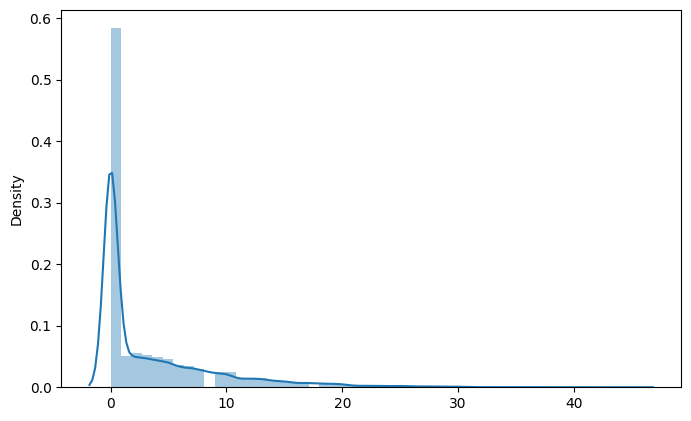

In [132]:
sns.distplot(x = df['Total_Images'] , hist = True)

This is highly skewed towards right, using mode again. 

In [133]:
df['Total_Images'].fillna(df['Total_Images'].mode()[0] , inplace = True)

In [134]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

Only "Customer_Location" have null values now, I do not yet know how it will affect how classification, thus deciding to take care of it inlater stage after more anslysis.

2. Exploratory data analysis

---



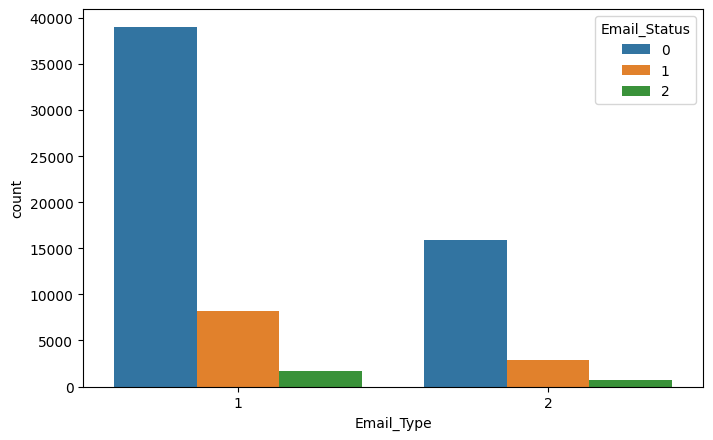

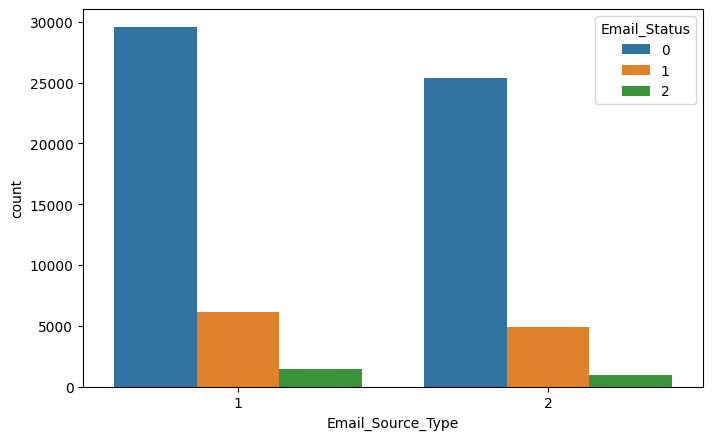

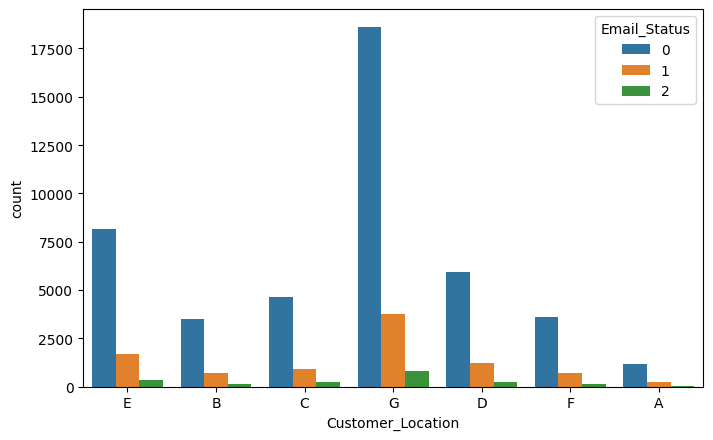

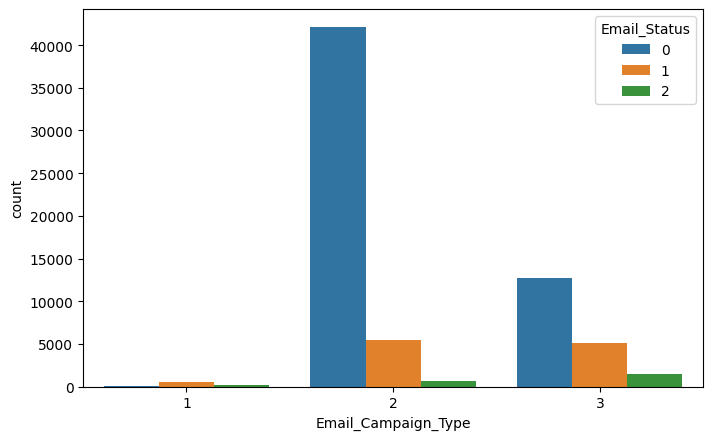

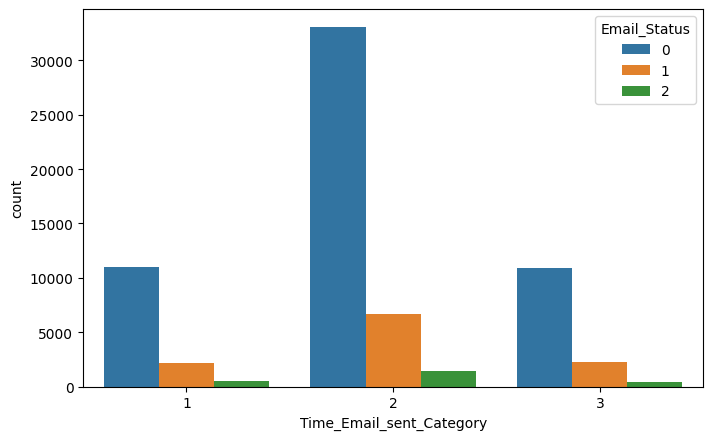

In [135]:
#Writing a loop to plot all categorical variable.
categorical_var = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']

for column in categorical_var:
  az = sns.countplot(x = df[column] , hue = df['Email_Status'])
  plt.show()

Observation: 

1. Email type 1 seems to be sent in much higher number, but overall the ration of ignored, read , acknoweldge seems to be the same in graph. 
2. Email source shows very similar pattern. 
3. In the location graph again, the ratio seems quite similar, except for location g. 
4. Campaign 1 have a very high % of email read, while campaign 3 have high % of email acknowledged. Campaign 2 have too many emails ignored. 
5. There are much more number of email send in time '2'. Assuming that 1 is morning, 2 is working hours and 3 is night. People are usually more available during working hrs to open mail, thus it makes more sense as well. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


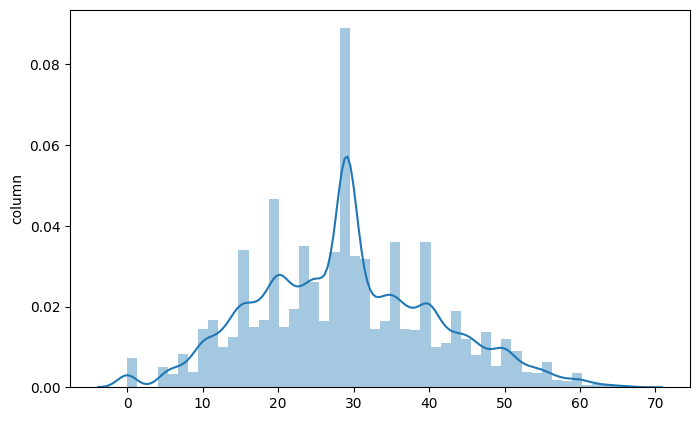

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


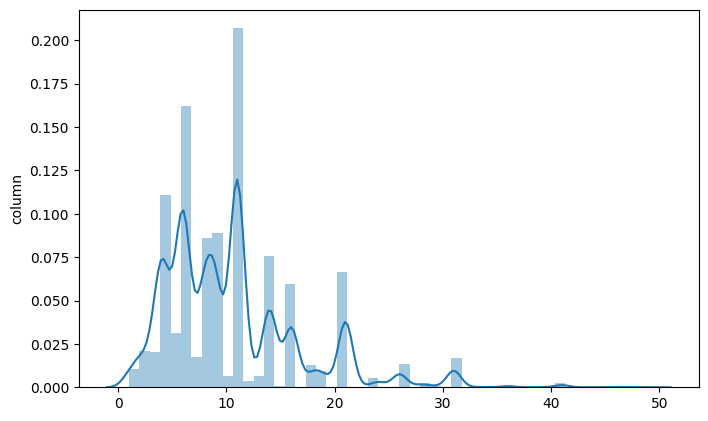

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


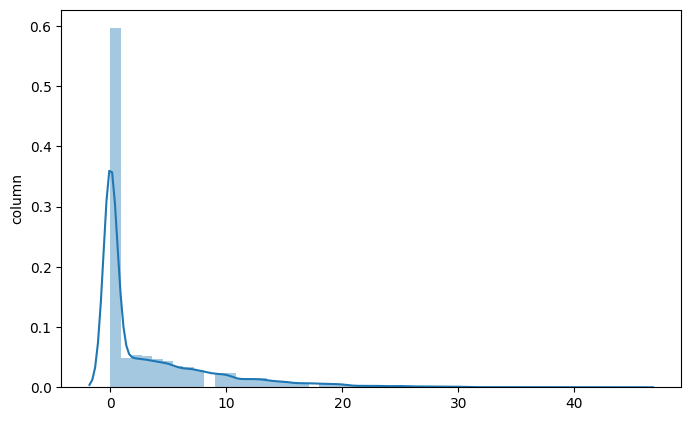

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


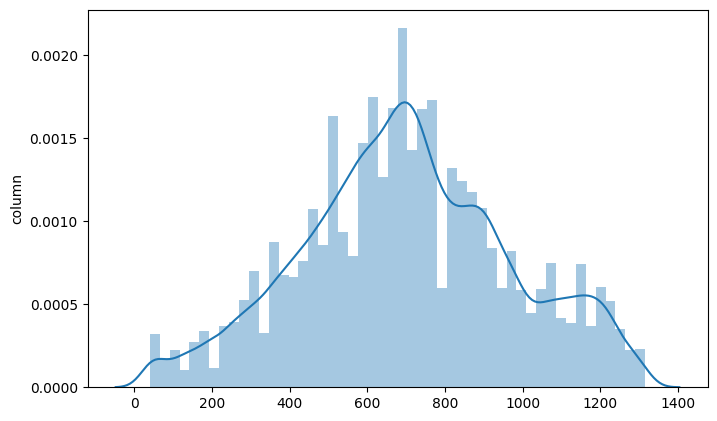

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


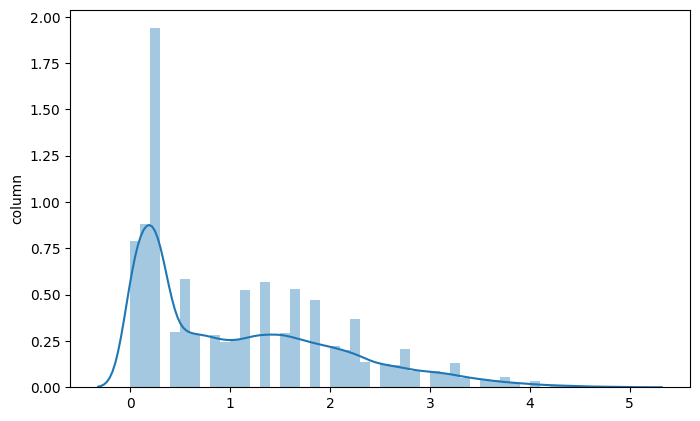

In [136]:
#Making a loop to plot all continous variable. 

cont_var = ['Total_Past_Communications' , 'Total_Links', 'Total_Images' ,'Word_Count' , 'Subject_Hotness_Score']

for column in cont_var:
  az = sns.distplot( x = df[column] , hist = True)
  plt.ylabel('column')
  plt.show()

The word count have a normal looking distribution, while Subject hotness is skewed towards right. All other graphs were plotted earlier as well. 

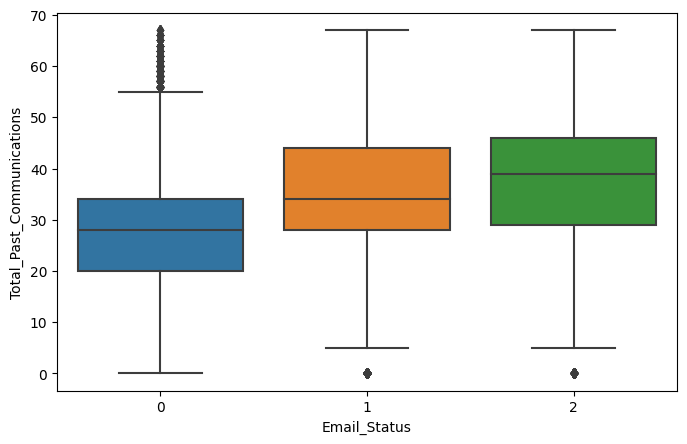

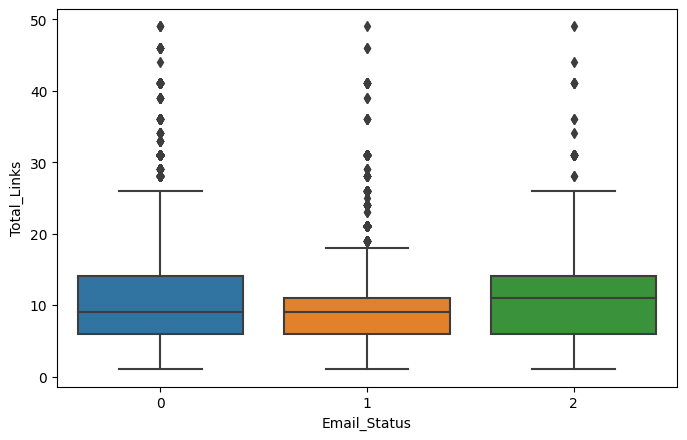

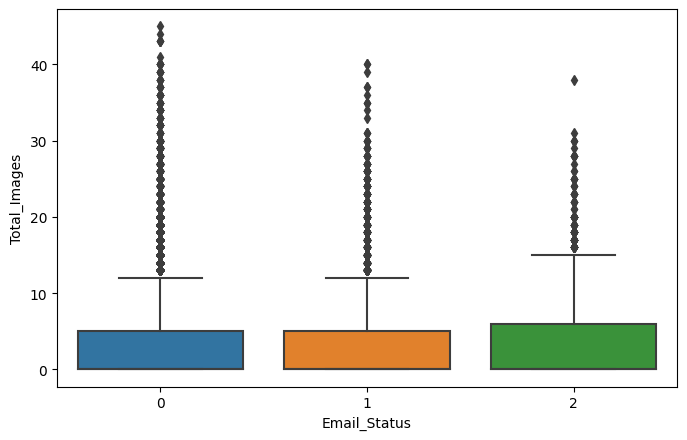

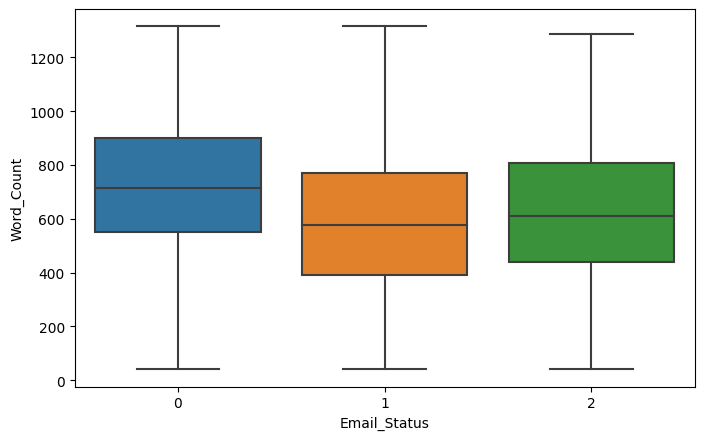

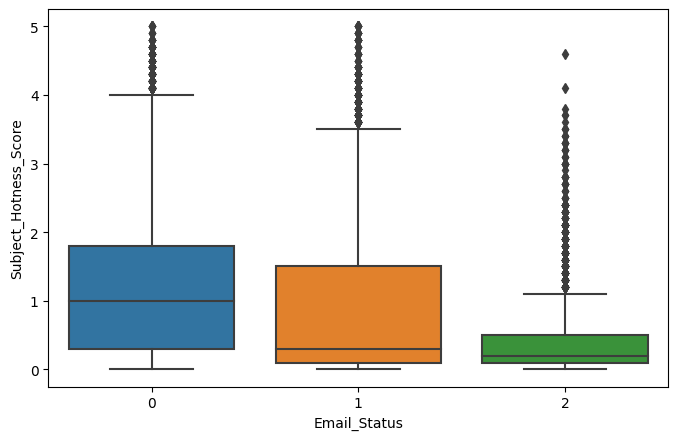

In [137]:
# Let's look into the box plot. 

for column in cont_var:
  az = sns.boxplot(x = df['Email_Status'] , y = df[column])
  plt.show()

Observation:

1. In case when more number of total communication is there with audience, the more emails gets read and acknowledge. 
2. Mean of number of links in ignored, read and acknowledge is similar. 
3. Ignored emails have more images. 
4. Ignored emails also have higher words. 
5. '3' email status have many outliers in subject hotness score plot.

**Checking co-relation**. 

---





In [138]:
#I am dropping email and costomer id as they don't contribute in corelation. 

df_cor = df.drop(['Email_ID' , 'Customer_Location'] , axis = 1)

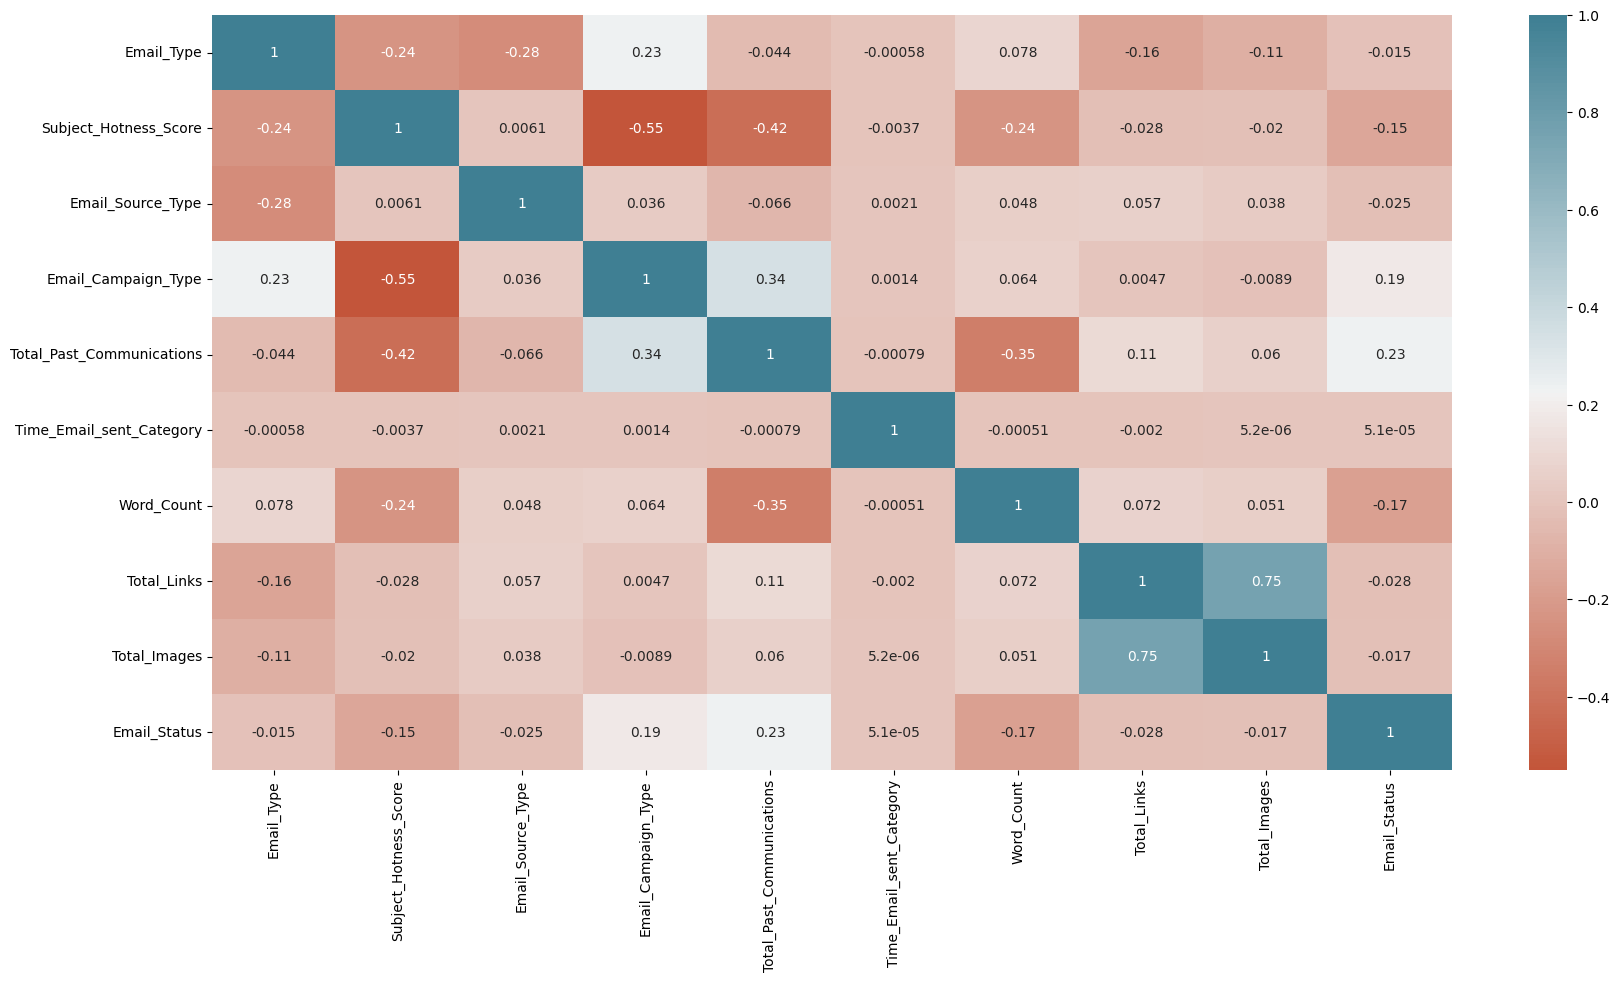

In [139]:
#Plotting heat map. 

plt.figure( figsize = (20,10))
sns.heatmap(df_cor.corr() , cmap = sns.diverging_palette(20, 220, n=200) , annot = True)

Observation:

Total past communication and email campaign types have positive corelation with with email status, as hypothesis was made earlier. Word count and subject hotness is -vely corelated. 
We can also see multicollinearity in many other columns as well, marked in green. Dealing with it.

3. Data manipulation and feature engineering. 

---



In [140]:
#Starting with Multicollinearity and Feature Selection

#Imporitng lib for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
#Writing a function to calulcate VIF. 

def vif_calculator(df):
  vif  =pd.DataFrame()
  vif['Columns'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values , i) for i in range(0,df.shape[1])]
  return vif

In [142]:
#Getting vif and DataFrame

vif_df = vif_calculator(df[[i for i in df.describe().columns if i not in categorical_var + ['Email_Status']]])
vif_df

,Columns,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


Total links have a very high vif of 8. We have seen earlier that total links and total images are highly corelated thus we can either drop it or combine. 

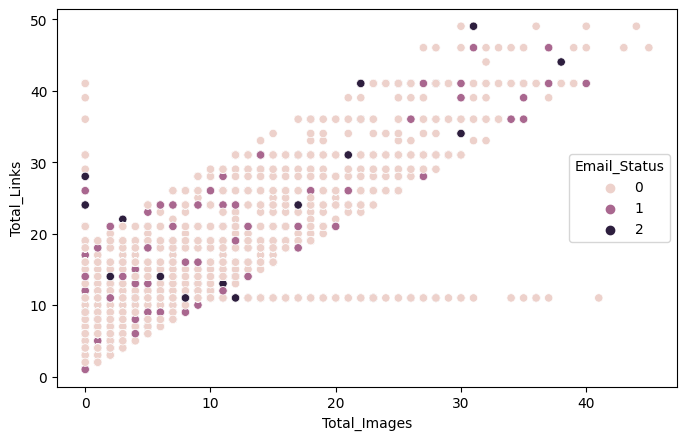

In [143]:
#Let's plot a scatter plot. 

sns.scatterplot( x = df['Total_Images'] , y = df['Total_Links'] , hue= df['Email_Status'])

This shows in general a linear relation. 

I will try to combine the, and then check vif again. 

In [144]:
df['Image_Link_Total'] = df['Total_Images'] + df['Total_Links']

df.drop(['Total_Images' , 'Total_Links'] , inplace = True , axis =1)

In [145]:
vif_df = vif_calculator(df[[i for i in df.describe().columns if i not in categorical_var + ['Email_Status']]])

vif_df

,Columns,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Image_Link_Total,2.629047


The vif scores are under 5 so multicollinearity is taken care of. 

**Outliers:**

We have already observed that all cont. variables in the data have outliers( except word count as shown in box plot). 
As deleting data can potentially lead to information loss, I am going to see if deleting them will loose more than 5% of information or how much of outliers are in minority class. 

In [146]:
cont_var

['Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count',
 'Subject_Hotness_Score']

In [147]:
#Removing word count (as no outliers here), total links and total imnages. Adding the new column created: Image link Total.
cont_var.remove('Word_Count')
cont_var.remove('Total_Links')
cont_var.remove('Total_Images')
cont_var.append('Image_Link_Total')


In [148]:
outliers = {}
for elem in cont_var:
  q_75, q_25 = np.percentile(df.loc[:,elem],[75,25])
  IQR_zone = q_75-q_25
  max = q_75+(1.5*IQR_zone)
  min = q_25-(1.5*IQR_zone)
  outlier_list=[]
  outlier_list=df.loc[df[elem] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[elem] > max]['Email_Status'].tolist()) 
  outliers[elem]={}
  for i in outlier_list[0]:
      outliers[elem][i] = outliers[elem].get(i,0) + 1
print(outliers)

{'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Image_Link_Total': {0: 3061, 1: 437, 2: 122}}


In [149]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [150]:
#Calculating % of outliers in minority class. 

minority_outliers = 0  
majority_outliers = 0
for col in cont_var:
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

total_min = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_maj = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_min)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_maj)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_min+total_maj))*100

In [151]:
#Printing results.

print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


More than 5% outliers lies in minority section thus, I won't drop it.

In [152]:
#Dropping outliers in majority.

for elem in cont_var:
  q_low = df[elem].quantile(0.01)
  q_hi  = df[elem].quantile(0.99)
  df = df.drop(df[(df[elem] > q_hi) &  (df['Email_Status']==0)].index)
  df = df.drop(df[(df[elem] < q_low) & (df['Email_Status']==0)].index)

In [153]:
df.shape

(66914, 11)

In [154]:
df['Email_Status'].value_counts()

0    53502
1    11039
2     2373
Name: Email_Status, dtype: int64

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

In [155]:
#Adding word count back here. 

cont_var.append('Word_Count')

In [156]:
#feature scaling of numerical variables
for elem in cont_var:
  df[elem] = (df[elem] - df[elem].mean()) / (df[elem].std())

df.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Image_Link_Total
0,EMA00081000034500,1,1.163386,2,E,2,0.348093,1,-0.980426,0,-0.545194


**One hot encoding**

Converting the categorical labels as vector.


In [157]:
#I have already seen and decided that customer location don't play any role in out analysis, thus I am dropping them from from columns that needs to be one hot encoded. 

categorical_var.remove('Customer_Location')

#Following features are going to be one hot encoded .

categorical_var

['Email_Type',
 'Email_Source_Type',
 'Email_Campaign_Type',
 'Time_Email_sent_Category']

In [158]:
#creating dummy variables
df = pd.get_dummies(df,columns=categorical_var)

In [159]:
#Email type 2 and email source type 2 columns as they are in binary, thus no need for them. It wil;l help in keeping df smaller and make model run faster. 

df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)

In [160]:
#As seen earlier, we have no use of Email Id and location, thus dropping them. 

df.drop(['Email_ID' , 'Customer_Location'] , axis = 1, inplace =True)

4. Modelling

---



In [161]:
df.shape

(66914, 13)

In [162]:
#Splitting the data set. 

x = df.drop('Email_Status' , axis = 1)
y = df['Email_Status']

x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 1 , stratify =y)

**Class imbalance.**

Oversampling - Oversampling methods duplicate or create new synthetic examples in the minority class.
Undersampling - undersampling methods delete or merge examples in the majority class.

I have already seen that the email status 1(un-opened) have much higher number than on 1 and 2. Thus, it's a case of class imbalance will will lead to biased results in our model. I  will use above two methods to handle it. 

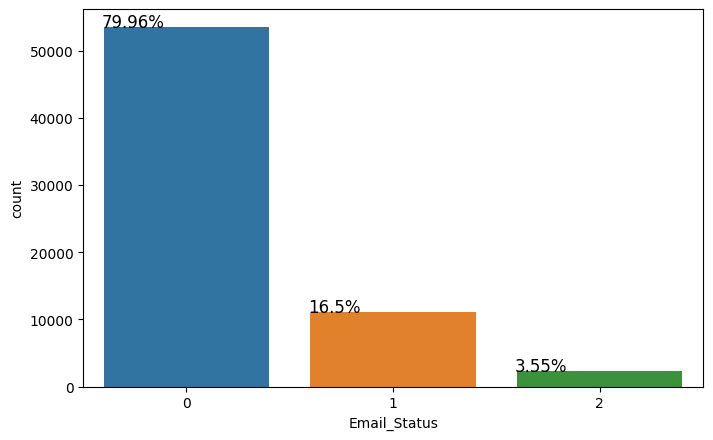

In [163]:
#First, let's see % of each class. 

ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

The class inbalance favours un-opened emails, as said earlier. It's 79.96% of label. 

I will perform both random undersampling and SMOTE and later see which one perform best among these. 

In [164]:
#Performing random undersampling at first. 

#Importing lib
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [165]:
ru = RandomUnderSampler(random_state = 1 , replacement = True)
x_train_ru , y_train_ru = ru.fit_resample(x_train , y_train)

In [166]:
y_train_ru.value_counts()

0    1898
1    1898
2    1898
Name: Email_Status, dtype: int64

In [171]:
len(y_train_ru)

5694

Thus, all class have same number of data now. 

In [167]:
#Performing SMOTE now. 

from imblearn.over_sampling import SMOTE

In [168]:
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [169]:
y_train_smote.value_counts()

0    42802
1    42802
2    42802
Name: Email_Status, dtype: int64

In [172]:
len(y_train_smote)

128406

As seen above, y_train of smote have a much bigger data set. 

Making a function to run and compare different models. 

---



In [173]:
#Columns req. for model comparision Table. 
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
#Function to evaluate model. 

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):


  #Prediction by random unsampling. 
  y_pred_ru_train = model_var_rus.predict(x_train_rus)
  y_pred_ru_test = model_var_rus.predict(x_test)
  #Probablity

